In [ ]:

#Parameters:  {'f1': 64, 'f2': 64, 'f3': 512, 'k': 5, 'a1': 'selu', 'a2': 'relu', 'd1': 0.2, 'd2': 0.2, 'op': 'adamax', 'ep': 86}
#Accuracy:  0.971# for stageclassification   in t2 , t3 and t4  without gan :
#  path of image folder  '/content/drive/MyDrive/stage_classification'
#  path of  its Csv file  /content/drive/MyDrive/stage_classification_november.csv
from keras import layers
from keras import models
from keras.callbacks import EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import keras.utils as image
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow as tf

%matplotlib inline

In [ ]:
!unzip "/content/drive/MyDrive/Self/Reduced_dataset-20230509T080830Z-001.zip"

Archive:  /content/drive/MyDrive/Self/Reduced_dataset-20230509T080830Z-001.zip
  inflating: Reduced_dataset/82290706.jpg  
  inflating: Reduced_dataset/7635457.jpg  
  inflating: Reduced_dataset/66571398.jpg  
  inflating: Reduced_dataset/69119767.jpg  
  inflating: Reduced_dataset/78946276.jpg  
  inflating: Reduced_dataset/81000729.jpg  
  inflating: Reduced_dataset/71842711.jpg  
  inflating: Reduced_dataset/72286182.jpg  
  inflating: Reduced_dataset/70816770.jpg  
  inflating: Reduced_dataset/8129389.jpg  
  inflating: Reduced_dataset/65328715.jpg  
  inflating: Reduced_dataset/64610911.jpg  
  inflating: Reduced_dataset/54133224.jpg  
  inflating: Reduced_dataset/5666225.jpg  
  inflating: Reduced_dataset/62070739.jpg  
  inflating: Reduced_dataset/66494240.jpg  
  inflating: Reduced_dataset/84598209.jpg  
  inflating: Reduced_dataset/61074408.jpg  
  inflating: Reduced_dataset/82853961.jpg  
  inflating: Reduced_dataset/7160206.jpg  
  inflating: Reduced_dataset/52729180.jpg  
 

In [ ]:
!unzip /content/drive/MyDrive/Self/train_images-20230509T080830Z-001.zip

Archive:  /content/drive/MyDrive/Self/train_images-20230509T080830Z-001.zip
  inflating: train_images/80998969.jpg  
  inflating: train_images/83870062.jpg  
  inflating: train_images/77379532.jpg  
  inflating: train_images/82105739.jpg  
  inflating: train_images/83337985.jpg  
  inflating: train_images/81000729.jpg  
  inflating: train_images/83814661.jpg  
  inflating: train_images/80488129.jpg  
  inflating: train_images/74548158.jpg  
  inflating: train_images/84339133.jpg  
  inflating: train_images/84269918.jpg  
  inflating: train_images/79867712.jpg  
  inflating: train_images/81164598.jpg  
  inflating: train_images/76610968.jpg  
  inflating: train_images/79165028.jpg  
  inflating: train_images/79867712(1).jpg  
  inflating: train_images/77981157.jpg  
  inflating: train_images/75951556.jpg  
  inflating: train_images/71913940.jpg  
  inflating: train_images/72299830.jpg  
  inflating: train_images/76026574.jpg  
  inflating: train_images/81845086.jpg  
  inflating: train_

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
#train = pd.read_csv('/content/drive/MyDrive/s1-s2 and s3-s4.csv')   # reading the csv file
train = pd.read_csv('/content/drive/MyDrive/Self/train.csv')

train.head(n=992)

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
...,...,...
498,108944327.jpg,3
499,1089555688.jpg,3
500,1089661926.jpg,1
501,1089759212.jpg,0


In [ ]:
train.columns

Index(['image_id', 'label'], dtype='object')

In [ ]:
train['label'].value_counts()

3    307
4     61
1     53
2     52
0     30
Name: label, dtype: int64

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Self/train.csv")
df.label = df.label.astype(str)

In [ ]:
import cv2

In [ ]:
train_image = []
for i in tqdm(range(train.shape[0])):
    #img = image.load_img('/content/train_images',train['label'][i],target_size=(28,28,3))
    img = tf.keras.utils.load_img('/content/drive/MyDrive/Self/Reduced_images.jpg')
    #img = cv2.imread("/content/Reduced_dataset",cv2.resize(28,28))
    print(img)
    img = image.img_to_array(img)

    #img = img/255
    #train_image.append(img)
X = np.array(train_image)


  1%|          | 6/503 [00:00<00:08, 58.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25600>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePl

  4%|▍         | 20/503 [00:00<00:07, 63.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePl

  7%|▋         | 34/503 [00:00<00:07, 60.87it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>


 10%|▉         | 50/503 [00:00<00:06, 67.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePl

 14%|█▍        | 70/503 [00:00<00:05, 81.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195CD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePl

 18%|█▊        | 90/503 [00:01<00:04, 89.73it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195CD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePl

 22%|██▏       | 110/503 [00:01<00:04, 93.72it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePl

 26%|██▌       | 131/503 [00:01<00:03, 94.81it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePl

 30%|███       | 151/503 [00:01<00:03, 95.93it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePl

 34%|███▍      | 171/503 [00:02<00:03, 94.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePl

 38%|███▊      | 192/503 [00:02<00:03, 96.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePl

 40%|████      | 202/503 [00:02<00:03, 88.79it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D269B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePl

 44%|████▎     | 220/503 [00:02<00:03, 76.69it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePl

 45%|████▌     | 228/503 [00:02<00:03, 73.73it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePl

 49%|████▊     | 244/503 [00:03<00:03, 67.88it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FFA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FFA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FFA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FFA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1F940>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195CD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FCA0>
<PIL.JpegImagePl

 51%|█████▏    | 258/503 [00:03<00:03, 65.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FFA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FCA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FFA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FCA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195CD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePl

 54%|█████▍    | 272/503 [00:03<00:03, 65.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FCA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FFA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1F940>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FCA0>
<PIL.JpegImagePl

 57%|█████▋    | 286/503 [00:03<00:03, 64.47it/s]


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>


 60%|█████▉    | 300/503 [00:03<00:03, 63.70it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FFA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePl

 62%|██████▏   | 314/503 [00:04<00:03, 62.73it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1F940>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePl

 65%|██████▌   | 328/503 [00:04<00:02, 64.68it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195CD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1F940>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FFA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1F940>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FFA0>
<PIL.JpegImagePl

 68%|██████▊   | 342/503 [00:04<00:02, 65.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePl

 71%|███████   | 356/503 [00:04<00:02, 65.96it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePl

 72%|███████▏  | 363/503 [00:04<00:02, 63.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1F940>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25870>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePl

 75%|███████▍  | 377/503 [00:05<00:01, 63.97it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195DAE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195CD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195DAE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195CD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195DAE0>
<PIL.JpegImagePl

 78%|███████▊  | 391/503 [00:05<00:01, 65.71it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1F940>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1F940>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FCA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePl

 81%|████████  | 405/503 [00:05<00:01, 63.97it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195CD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195DAE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195CD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195DAE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195CD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195DAE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195CD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195DAE0>
<PIL.JpegImagePl

 83%|████████▎ | 419/503 [00:05<00:01, 64.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePl

 86%|████████▌ | 433/503 [00:05<00:01, 63.91it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePl

 89%|████████▉ | 449/503 [00:06<00:00, 70.98it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePl

 93%|█████████▎| 469/503 [00:06<00:00, 82.79it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26260>
<PIL.JpegImagePl

 97%|█████████▋| 489/503 [00:06<00:00, 88.75it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D26020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1F940>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25B40>
<PIL.JpegImagePl

100%|██████████| 503/503 [00:06<00:00, 73.96it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195CD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750C1FFA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D266B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF75195CD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7FF750D25AB0>


In [ ]:
import os
totalFiles = 0
APP_FOLDER = "/content/Reduced_dataset"
for files in os.listdir(APP_FOLDER):
     totalFiles += 1
print(totalFiles)

69


In [ ]:
X=train['image_id'].values
print(X)
X.shape

['1000015157.jpg' '1000201771.jpg' '100042118.jpg' '1000723321.jpg'
 '1000812911.jpg' '1000837476.jpg' '1000910826.jpg' '1001320321.jpg'
 '1001723730.jpg' '1001742395.jpg' '1001749118.jpg' '100204014.jpg'
 '1002088496.jpg' '1002255315.jpg' '1002394761.jpg' '1003218714.jpg'
 '1003298598.jpg' '1003442061.jpg' '1003888281.jpg' '1003987001.jpg'
 '1004105566.jpg' '1004163647.jpg' '1004389140.jpg' '1004672608.jpg'
 '100472565.jpg' '1004826518.jpg' '1004881261.jpg' '1005138819.jpg'
 '1005200906.jpg' '100533489.jpg' '100560400.jpg' '1005695738.jpg'
 '1005739807.jpg' '100609661.jpg' '1007196516.jpg' '1007246985.jpg'
 '100731318.jpg' '1007533812.jpg' '1007700625.jpg' '1007891044.jpg'
 '1008126487.jpg' '1008142548.jpg' '1008244905.jpg' '1008284502.jpg'
 '1008532311.jpg' '1009037539.jpg' '1009049118.jpg' '1009126931.jpg'
 '1009148537.jpg' '1009268848.jpg' '1009322597.jpg' '1009361983.jpg'
 '1009431532.jpg' '1009441020.jpg' '1009462599.jpg' '1009489704.jpg'
 '1009495847.jpg' '1009704586.jpg' '10097

(503,)

In [ ]:
y=train['label'].values
print(y)
y.shape



[0 3 1 1 3 3 2 0 4 3 3 3 1 3 3 2 3 4 0 3 3 3 1 3 2 2 3 3 2 2 4 3 3 3 3 3 3
 3 3 3 3 1 1 3 3 3 3 4 1 3 3 3 2 3 3 3 3 3 2 3 1 3 4 3 3 3 3 4 2 3 4 4 1 0
 1 3 1 3 1 4 3 3 3 4 2 3 3 1 3 3 3 3 2 1 3 3 1 1 2 3 2 4 2 2 4 3 3 1 3 0 3
 4 4 3 3 3 3 3 0 3 3 1 2 0 3 3 3 3 3 3 4 3 4 3 3 4 0 3 2 3 1 0 3 3 3 2 3 2
 3 3 3 2 0 3 1 3 3 3 0 3 3 4 3 3 1 2 3 3 3 3 1 3 3 3 3 2 1 3 0 1 4 4 3 3 3
 2 3 1 4 3 3 3 3 3 2 3 3 3 0 1 3 1 3 3 1 3 3 4 4 3 3 3 3 3 3 0 1 3 3 3 3 3
 3 3 2 3 2 3 3 3 3 3 3 4 3 2 4 3 3 3 2 3 3 0 3 4 3 4 2 3 3 4 3 3 4 3 2 3 3
 1 2 4 3 3 3 4 3 4 3 3 3 3 2 4 0 3 2 3 2 3 3 3 4 3 3 3 3 3 1 3 4 0 3 0 1 0
 3 0 3 3 3 3 3 3 3 3 1 2 2 2 3 1 2 3 3 3 3 4 3 3 4 0 3 3 1 2 3 3 4 3 3 3 3
 2 3 3 2 3 0 3 4 4 3 3 3 3 2 3 3 3 3 3 3 1 3 3 4 3 3 3 2 3 4 1 3 3 3 3 4 3
 3 4 3 3 3 3 2 3 3 3 3 3 3 2 3 1 3 3 3 3 3 3 3 3 3 0 1 3 1 0 3 4 3 3 1 3 3
 4 4 4 1 3 3 3 1 3 3 4 3 3 3 3 3 0 2 3 4 3 3 1 1 3 3 3 4 4 2 4 1 3 3 0 1 3
 3 3 3 3 3 1 3 1 3 4 3 3 0 1 3 0 4 1 4 3 3 2 4 3 3 4 2 2 4 3 3 2 3 4 1 3 3
 3 0 3 3 3 3 4 3 3 3 3 2 

In [ ]:
print(y.shape)


(503,)


In [ ]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print(integer_encoded)

[0 3 1 1 3 3 2 0 4 3 3 3 1 3 3 2 3 4 0 3 3 3 1 3 2 2 3 3 2 2 4 3 3 3 3 3 3
 3 3 3 3 1 1 3 3 3 3 4 1 3 3 3 2 3 3 3 3 3 2 3 1 3 4 3 3 3 3 4 2 3 4 4 1 0
 1 3 1 3 1 4 3 3 3 4 2 3 3 1 3 3 3 3 2 1 3 3 1 1 2 3 2 4 2 2 4 3 3 1 3 0 3
 4 4 3 3 3 3 3 0 3 3 1 2 0 3 3 3 3 3 3 4 3 4 3 3 4 0 3 2 3 1 0 3 3 3 2 3 2
 3 3 3 2 0 3 1 3 3 3 0 3 3 4 3 3 1 2 3 3 3 3 1 3 3 3 3 2 1 3 0 1 4 4 3 3 3
 2 3 1 4 3 3 3 3 3 2 3 3 3 0 1 3 1 3 3 1 3 3 4 4 3 3 3 3 3 3 0 1 3 3 3 3 3
 3 3 2 3 2 3 3 3 3 3 3 4 3 2 4 3 3 3 2 3 3 0 3 4 3 4 2 3 3 4 3 3 4 3 2 3 3
 1 2 4 3 3 3 4 3 4 3 3 3 3 2 4 0 3 2 3 2 3 3 3 4 3 3 3 3 3 1 3 4 0 3 0 1 0
 3 0 3 3 3 3 3 3 3 3 1 2 2 2 3 1 2 3 3 3 3 4 3 3 4 0 3 3 1 2 3 3 4 3 3 3 3
 2 3 3 2 3 0 3 4 4 3 3 3 3 2 3 3 3 3 3 3 1 3 3 4 3 3 3 2 3 4 1 3 3 3 3 4 3
 3 4 3 3 3 3 2 3 3 3 3 3 3 2 3 1 3 3 3 3 3 3 3 3 3 0 1 3 1 0 3 4 3 3 1 3 3
 4 4 4 1 3 3 3 1 3 3 4 3 3 3 3 3 0 2 3 4 3 3 1 1 3 3 3 4 4 2 4 1 3 3 0 1 3
 3 3 3 3 3 1 3 1 3 4 3 3 0 1 3 0 4 1 4 3 3 2 4 3 3 4 2 2 4 3 3 2 3 4 1 3 3
 3 0 3 3 3 3 4 3 3 3 3 2 

In [ ]:
y = to_categorical(integer_encoded)
tf.convert_to_tensor(y)     #label 2 is converted in 1 and 4 in 2 in csv file stage_classification

<tf.Tensor: shape=(503, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)>

In [ ]:

X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
  model = models.Sequential()
  model.add(layers.Conv2D(filters = 64, kernel_size = (5,5), input_shape = (28,28,3),activation= 'relu'))
  model.add(layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'))
  model.add(layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Flatten())
  model.add(layers.Dropout(rate = 0.3))
  model.add(layers.Dense(units = 512, activation = 'relu'))
  model.add(layers.Dropout(rate = 0.2))
  model.add(layers.Dense(4, activation= "softmax"))
  model.summary()

  model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
  #es = EarlyStopping(monitor="val_accuracy", patience = 7)
  #model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks = [es], verbose=0)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 24, 24, 64)        4864      
                                                                 
 conv2d_28 (Conv2D)          (None, 20, 20, 64)        102464    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 6, 6, 64)          102464    
                                                                 
 conv2d_30 (Conv2D)          (None, 2, 2, 64)          102464    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                 

In [ ]:
r=model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50


ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,cohen_kappa_score
#import seaborn as sns
# Use trained model to predict output of test dataset
y_pred = model.predict(X_test)

y_pred=np.argmax(y_pred)
y_test=np.argmax(y_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)

# View accuracy score

print('Classification Report')
target_names = ['CBB','CBSD','CGM','CMD','Healthy']
clf_report=classification_report(y_test, y_pred)
print(clf_report)
#sns.heatmap(cm/np.sum(cm),xticklabels=['malign-actual','benign-actual'], yticklabels=['malign-pred','benign-pred'], annot=True,   fmt='.2%',cbar=False,cmap="YlGnBu")


ValueError: ignored

In [ ]:
from sklearn.metrics import cohen_kappa_score
ckappa=cohen_kappa_score(y_test, y_pred)
print("kappa score")
print(ckappa)

NameError: ignored

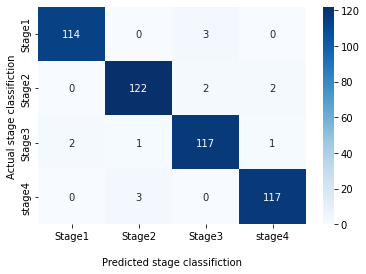

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(confusion_matrix(y_test, y_pred),fmt="d", annot=True, cmap='Blues')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted stage classifiction')
ax.set_ylabel('Actual stage classifiction');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Stage1','Stage2', 'Stage3','stage4'])
ax.yaxis.set_ticklabels(['Stage1','Stage2', 'Stage3','stage4'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

# Use trained model to predict output of test dataset


lb = preprocessing.LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
y_pred_lb = lb.transform(y_pred)

print("ROC_AUC_Score",roc_auc_score(y_test_lb, y_pred_lb, average='macro'))

ROC_AUC_Score 0.9807395566012655


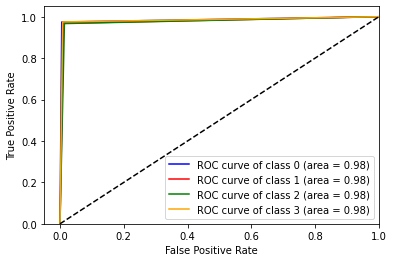

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0, 1, 2,3])
n_classes = y.shape[1]
y_score=y_pred_lb

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    fpr[i], tpr[i],_ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic for oral can data')
plt.legend(loc="lower right")
plt.show()


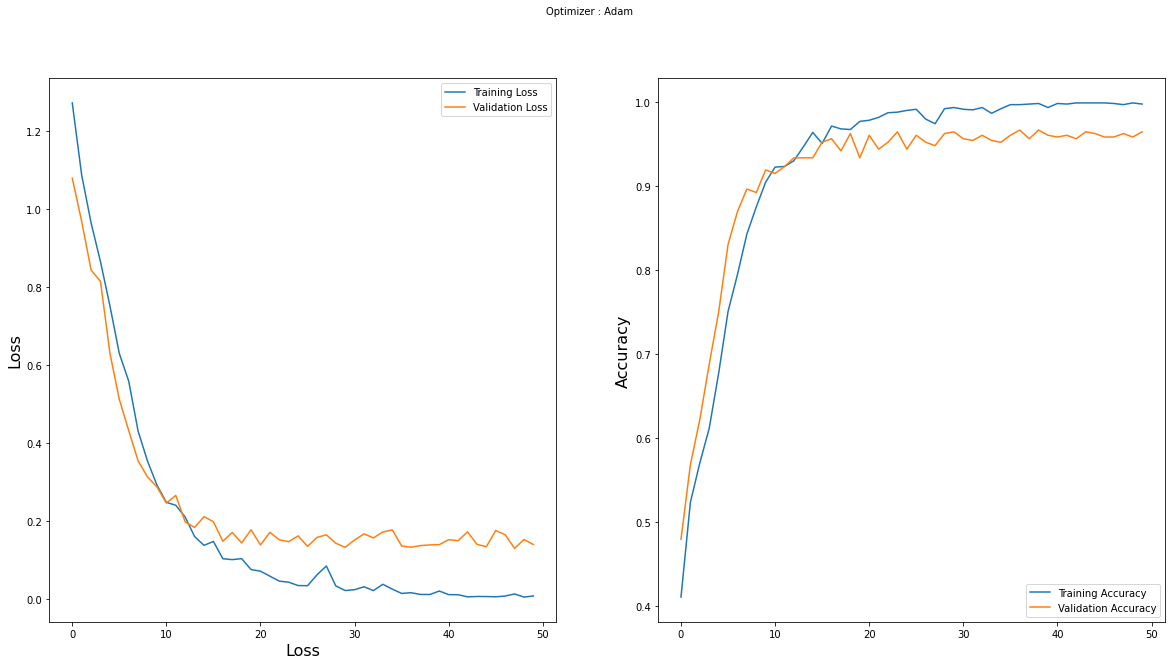

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Loss', fontsize=16)
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def CNN_model( f1, f2,f3, k, a1, a2, d1, d2, op, ep):
  model = models.Sequential()
  model.add(layers.Conv2D(filters = f1, kernel_size = (k, k), activation = a1, input_shape = (28,28,3)))
  model.add(layers.Conv2D(filters = f1, kernel_size = (k, k), activation = a1))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(filters = f2, kernel_size = (k, k), activation = a2))
  model.add(layers.Conv2D(filters = f2, kernel_size = (k, k), activation = a2))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Flatten())
  model.add(layers.Dropout(rate = d1))
  model.add(layers.Dense(units = f3, activation = a2))
  model.add(layers.Dropout(rate = d2))
  model.add(layers.Dense(4, activation= "softmax"))

  model.compile(loss = "categorical_crossentropy", optimizer = op, metrics = ["accuracy"])
  es = EarlyStopping(monitor="val_accuracy", patience = 7)
  model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=ep, callbacks = [es], verbose=0)


  return model

In [ ]:
from random import choice
from random import uniform
from numpy.random import randint

In [ ]:

def initialization():
  parameters = {} # dictionary
  f1 = choice([32, 64])
  parameters["f1"] = f1
  f2 = choice([64, 128])
  parameters["f2"] = f2
  f3 = choice([128, 256, 512])
  parameters["f3"] = f3
  k = choice([3,5])
  parameters["k"] = k
  a1 = choice(["relu", "selu", "elu"])
  parameters["a1"] = a1
  a2 = choice(["relu", "selu", "elu"])
  parameters["a2"] = a2
  d1 = round(uniform(0.1, 0.5), 1)
  parameters["d1"] = d1
  d2 = round(uniform(0.1, 0.5), 1)
  parameters["d2"] = d2
  op = choice(["adamax", "adadelta", "adam", "adagrad"])
  parameters["op"] = op
  ep = randint(50, 100)
  parameters["ep"] = ep
  return parameters

In [ ]:
def generate_population(n):
  population = []
  for i in range(n):
    chromosome = initialization()
    population.append(chromosome)
  return population



In [ ]:

# Fitness evaluation metric: Classification Accuracy
def fitness_evaluation(model):
  metrics = model.evaluate(X_test, y_test)
  return metrics[1]

In [ ]:

# Roulette wheel selection method
def selection(population_fitness):
  total = sum(population_fitness)
  percentage = [round((x/total) * 100) for x in population_fitness]
  selection_wheel = []
  for pop_index,num in enumerate(percentage):
    selection_wheel.extend([pop_index]*num)
  parent1_ind = choice(selection_wheel)
  parent2_ind = choice(selection_wheel)
  return [parent1_ind, parent2_ind]

In [ ]:
def crossover(parent1, parent2):
  child1 = {}
  child2 = {}

  child1["f1"] = choice([parent1["f1"], parent2["f1"]])
  child1["f2"] = choice([parent1["f2"], parent2["f2"]])
  child1["f3"] = choice([parent1["f3"], parent2["f3"]])

  child2["f1"] = choice([parent1["f1"], parent2["f1"]])
  child2["f2"] = choice([parent1["f2"], parent2["f2"]])
  child2["f3"] = choice([parent1["f3"], parent2["f3"]])

  child1["k"] = choice([parent1["k"], parent2["k"]])
  child2["k"] = choice([parent1["k"], parent2["k"]])

  child1["a1"] = parent1["a2"]
  child2["a1"] = parent2["a2"]

  child1["a2"] = parent2["a1"]
  child2["a2"] = parent1["a1"]

  child1["d1"] = parent1["d1"]
  child2["d1"] = parent2["d1"]

  child1["d2"] = parent2["d2"]
  child2["d2"] = parent1["d2"]

  child1["op"] = parent2["op"]
  child2["op"] = parent1["op"]

  child1["ep"] = parent1["ep"]
  child2["ep"] = parent2["ep"]
  return [child1, child2]



In [ ]:

def mutation(chromosome):
  flag = randint(0,40)
  if flag <= 20:
    chromosome["ep"] += randint(0, 10)
  return chromosome

In [ ]:

generations = 20
threshold = 90
num_pop = 10

population = generate_population(num_pop)

for generation in range(generations):

  population_fitness = []
  for chromosome in population:
    f1 = chromosome["f1"]
    f2 = chromosome["f2"]
    f3 = chromosome["f3"]
    k = chromosome["k"]
    a1 = chromosome["a1"]
    a2 = chromosome["a2"]
    d1 = chromosome["d1"]
    d2 = chromosome["d2"]
    op = chromosome["op"]
    ep = chromosome["ep"]

    model = CNN_model(f1, f2, f3, k, a1, a2, d1,d2, op, ep)

    try:
      model = CNN_model(f1,f2,  f3, k, a1, a2,d1, d2, op, ep)
      acc = fitness_evaluation(model)
      print("Parameters: ", chromosome)
      print("Accuracy: ", round(acc,3))
    except:
      acc=0
      print("Parameters: ", chromosome)
      print("Invalid parameters - Build fail")

    population_fitness.append(acc)

  parents_ind = selection(population_fitness)
  parent1 = population[parents_ind[0]]
  parent2 = population[parents_ind[1]]

  children = crossover(parent1, parent2)
  child1 = mutation(children[0])
  child2 = mutation(children[1])

  population.append(child1)
  population.append(child2)

  print("Generation ", generation+1," Outcome: ")
  if max(population_fitness) >= threshold:
    print("Obtained desired accuracy: ", max(population_fitness))
    break
  else:
    print("Maximum accuracy in generation {} : {}".format(generation+1, max(population_fitness)))

  first_min = min(population_fitness)
  first_min_ind = population_fitness.index(first_min)
  population.remove(population[first_min_ind])
  second_min = min(population_fitness)
  second_min_ind = population_fitness.index(second_min)
  population.remove(population[second_min_ind])


ValueError: ignored